Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Read CSV file into dataframe, display infor of each column and some basic metrics of the data.

In [20]:
fitbit_df = pd.read_csv('/content/sample_data/FitbitActivity(1-30-20).csv')

In [5]:
print(fitbit_df.info())
pd.set_option('display.max_columns', None)
print(fitbit_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357827 entries, 0 to 357826
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   egoid                 357827 non-null  int64  
 1   datadate              357827 non-null  object 
 2   complypercent         357827 non-null  int64  
 3   meanrate              357827 non-null  float64
 4   sdrate                357826 non-null  float64
 5   steps                 356751 non-null  float64
 6   floors                356927 non-null  float64
 7   sedentaryminutes      355844 non-null  float64
 8   lightlyactiveminutes  355844 non-null  float64
 9   fairlyactiveminutes   357823 non-null  float64
 10  veryactiveminutes     355844 non-null  float64
 11  lowrangemins          357827 non-null  int64  
 12  fatburnmins           357827 non-null  int64  
 13  cardiomins            357827 non-null  int64  
 14  peakmins              357827 non-null  int64  
 15  

In [6]:
fitbit_df.describe().transpose()
#Some individuals in this study started participating in the study a bit late. So that's why some 
#rows-columns values are missing. This will be replaced by mean or median.

,count,mean,std,min,25%,50%,75%,max
egoid,357827.0,56376.037180,25759.271748,10237.000000,33740.000000,56543.000000,79167.000000,99978.000000
complypercent,357827.0,85.228499,22.456762,1.000000,83.000000,96.000000,98.000000,100.000000
meanrate,357827.0,74.001024,9.594119,40.174862,67.280514,73.469315,80.047359,190.721850
sdrate,357826.0,15.430787,4.220816,0.000000,12.597967,15.047787,17.926842,66.399506
steps,356751.0,11051.223360,5873.476411,4.000000,6948.000000,10592.000000,14458.000000,87677.000000
floors,356927.0,17.236592,19.416539,0.000000,7.000000,13.000000,21.000000,670.000000
sedentaryminutes,355844.0,798.992190,265.477736,0.000000,631.000000,728.000000,871.000000,1440.000000
lightlyactiveminutes,355844.0,203.326781,97.808326,0.000000,151.000000,205.000000,261.000000,937.000000
fairlyactiveminutes,357823.0,25.326321,30.709126,0.000000,4.000000,16.000000,35.000000,506.000000
veryactiveminutes,355844.0,31.179885,36.190696,0.000000,2.000000,20.000000,47.000000,650.000000


Check if any columns have null values, if they do then replace it with mean or median.

In [7]:
fitbit_df.isna().sum()

egoid                      0
datadate                   0
complypercent              0
meanrate                   0
sdrate                     1
steps                   1076
floors                   900
sedentaryminutes        1983
lightlyactiveminutes    1983
fairlyactiveminutes        4
veryactiveminutes       1983
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
dtype: int64

In [8]:
355844/357827

0.9944582158417336

In [21]:
fitbit_df['sdrate'].fillna(fitbit_df['sdrate'].mean(skipna=True), inplace=True)
fitbit_df['steps'].fillna(fitbit_df['steps'].mean(skipna=True), inplace=True)
fitbit_df['floors'].fillna(fitbit_df['floors'].mean(skipna=True), inplace=True)
fitbit_df['sedentaryminutes'].fillna(fitbit_df['sedentaryminutes'].mean(skipna=True), inplace=True)
fitbit_df['lightlyactiveminutes'].fillna(fitbit_df['lightlyactiveminutes'].mean(skipna=True), inplace=True)
fitbit_df['fairlyactiveminutes'].fillna(fitbit_df['fairlyactiveminutes'].mean(skipna=True), inplace=True)
fitbit_df['veryactiveminutes'].fillna(fitbit_df['veryactiveminutes'].mean(skipna=True), inplace=True)


In [9]:
fitbit_df.isna().sum()

egoid                   0
datadate                0
complypercent           0
meanrate                0
sdrate                  0
steps                   0
floors                  0
sedentaryminutes        0
lightlyactiveminutes    0
fairlyactiveminutes     0
veryactiveminutes       0
lowrangemins            0
fatburnmins             0
cardiomins              0
peakmins                0
lowrangecal             0
fatburncal              0
cardiocal               0
peakcal                 0
dtype: int64

In [10]:
fitbit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
egoid,357827.0,56376.037180,25759.271748,10237.000000,33740.000000,56543.000000,79167.000000,99978.000000
complypercent,357827.0,85.228499,22.456762,1.000000,83.000000,96.000000,98.000000,100.000000
meanrate,357827.0,74.001024,9.594119,40.174862,67.280514,73.469315,80.047359,190.721850
sdrate,357827.0,15.430787,4.220810,0.000000,12.597975,15.047865,17.926813,66.399506
steps,357827.0,11051.223360,5864.638849,4.000000,6961.000000,10612.000000,14443.000000,87677.000000
floors,357827.0,17.236592,19.392106,0.000000,7.000000,13.000000,21.000000,670.000000
sedentaryminutes,357827.0,798.992190,264.741102,0.000000,632.000000,730.000000,869.000000,1440.000000
lightlyactiveminutes,357827.0,203.326781,97.536932,0.000000,151.000000,205.000000,261.000000,937.000000
fairlyactiveminutes,357827.0,25.326321,30.708954,0.000000,4.000000,16.000000,35.000000,506.000000
veryactiveminutes,357827.0,31.179885,36.090275,0.000000,2.000000,21.000000,47.000000,650.000000


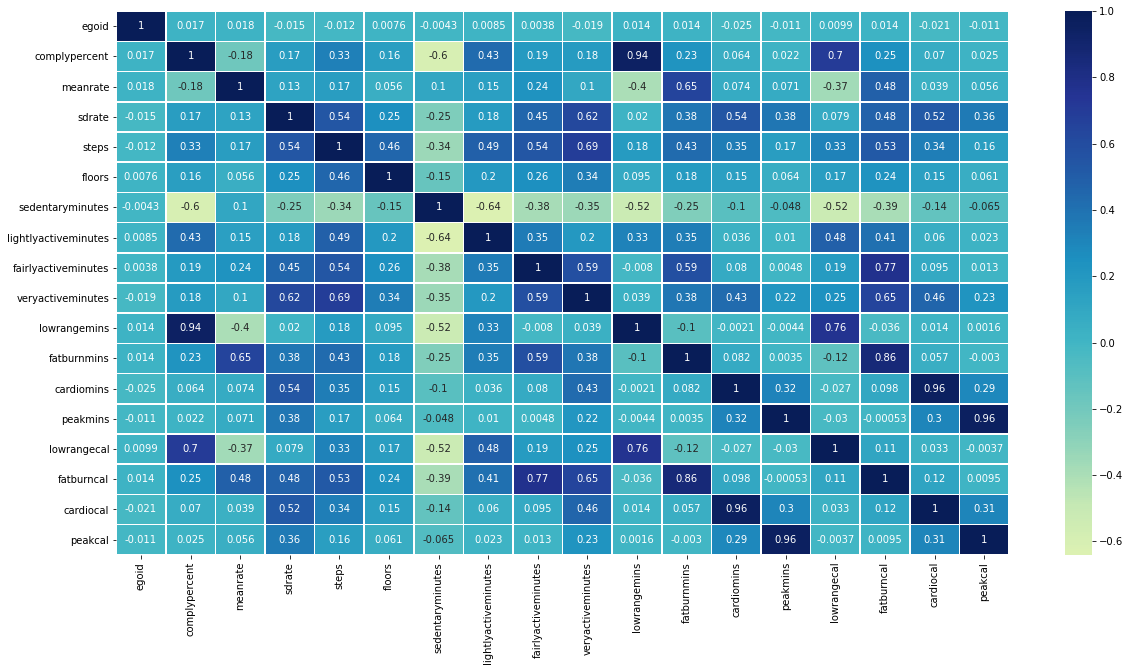

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(fitbit_df.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu")
plt.show()

There a total of 623 unique ids. This dataset was taken from, collected over a period of 1396 different dates

In [ ]:
for col in fitbit_df:
    if col == "egoid":
      print(len(fitbit_df[col].unique()))

Remove any columns which acts as keys and skew data. and any columns that may not affect clustering.

In [22]:
fitbit_df = fitbit_df.drop(['egoid','datadate','complypercent','sdrate'],axis=1)

In [ ]:
#egoid is the individual participant id. 
#datadate is for each particular row as to when the data was collected
#comply percent is how long within the day the particpant wore the watch for.
#not completely sure as to what sd-rate is will have to get in touch with dataset builders.

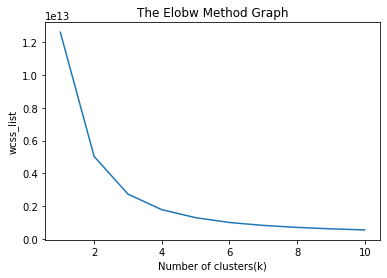

In [23]:
from sklearn.cluster import KMeans  

wcss_list= []  #Initializing the list for the values of WCSS  (sum of squares of distances) from centroid
  

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(fitbit_df)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

#from this piece of code we just get the optimal amount of clusters.
#clustering helps us tie the very similar data point "strongly"
#this helps us identify similar datapoint quickly and differentiate between data more efficiently.
#collection of objects with similarity and dissimilarity.
#the graph starts levelling off at 4 clusters

# wcss helps us identify the distance of each data point from each other from within the the group.
# this is done so that the closer the datapoints to each other
# the more easier it is differentiate a random incoming data.

# so the clusters can identify their own efficiently, but can't tell which other clusters they belong to.
# A big "surely ain't one of us" game.

https://www.cloudfactory.com/data-labeling-guide

ML operationalization 2.0%
ML Model tuning 5.0%
ML model training 10.0%
ML algorithm dev 3.0%

Data Identification 5.0%
Data Aggregation 10.0%
Data cleansing 25.0%
Data Augmentation 15.0%
Data labeling 25.0%.

In [25]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
kmeans.fit(fitbit_df)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [26]:
y_predict = kmeans.predict(fitbit_df)

In [34]:
from collections import Counter

Counter(y_predict).keys() # equals to list(set(words))
Counter(y_predict).values() # counts the elements' frequency

dict_values([91413, 139625, 97479, 29310])

In [17]:
fitbit_df['health_status'] = pd.Series(y_predict, index=fitbit_df.index)

In [18]:
fitbit_df.columns

Index(['meanrate', 'steps', 'floors', 'sedentaryminutes',
       'lightlyactiveminutes', 'fairlyactiveminutes', 'veryactiveminutes',
       'lowrangemins', 'fatburnmins', 'cardiomins', 'peakmins', 'lowrangecal',
       'fatburncal', 'cardiocal', 'peakcal', 'health_status'],
      dtype='object')

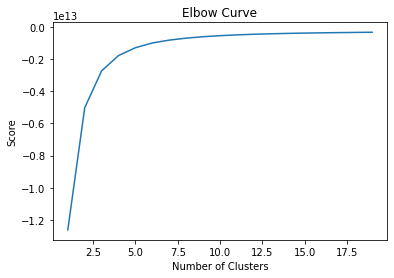

In [ ]:
"""
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(fitbit_df).score(fitbit_df) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
"""
# from this graph we see that the score rapidly improves at cluster 4.
# so the magic number for this dataset is 4.

In [19]:
fitbit_df.head()

,meanrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal,health_status
0,86.669746,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954,0
1,87.975342,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000,0
2,83.281448,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234,0
3,91.707787,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000,8
4,101.268140,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000,6


In [37]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
fitbit_df['meanrate'] = fitbit_df.health_status.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
fitbit_df['veryactiveminutes'] = fitbit_df.health_status.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF','#6A0DAD']
fitbit_df['c'] = fitbit_df.health_status.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})

In [ ]:
from sklearn.cluster import KMeans
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(fitbit_df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

mat = fitbit_df.values
# Using sklearn
km = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame(data=labels, columns=['cluster']) 

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

4358229.33886556

Text(0, 0.5, 'Inertia')

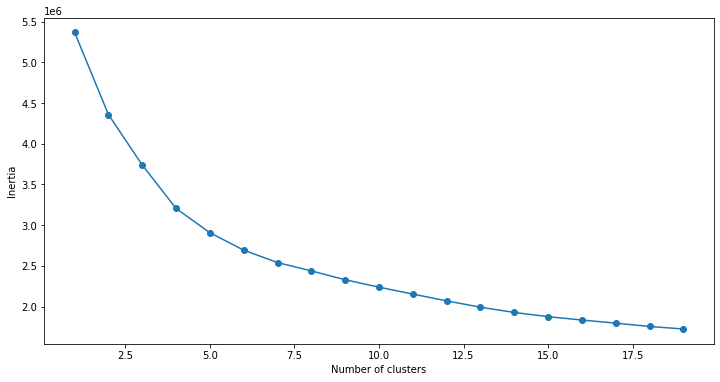

In [ ]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    190802
1     72457
4     66088
2     20944
3      7536
Name: cluster, dtype: int64

In [ ]:
label = kmeans.fit_predict(fitbit_df)

In [ ]:
print(label.size)

357827
